## Инициализация

In [1]:
import os, shutil

In [2]:
os.getcwd()

'c:\\Users\\igorv\\OneDrive\\Documents\\GitHub\\NeuralNetworks\\from_book'

In [3]:
dataset = os.getcwd().replace('\\','/')+'/data/PetImages/'
def copy_files(fnames, animal, destination):
    for fname in fnames:
        src = os.path.join(dataset, animal, fname)
        dst = os.path.join(destination, fname)
        shutil.copyfile(src, dst)

In [4]:
base = os.getcwd().replace('\\','/')+'/data/cats_and_dogs'
train_dir = os.path.join(base, 'train')
val_dir = os.path.join(base, 'val')
test_dir = os.path.join(base, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(val_dir, 'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
dirs = [base, train_dir, val_dir, test_dir, train_cats_dir,
        train_dogs_dir, validation_cats_dir, validation_dogs_dir,
        test_cats_dir, test_dogs_dir]
for f in dirs:
    if not os.path.exists(f):
        os.mkdir(f)
animal = 'Cat/' 
fnames = ['{}.jpg'.format(i) for i in range(1000)]
copy_files(fnames, animal, train_cats_dir)
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)] 
copy_files(fnames, animal, validation_cats_dir)
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
copy_files(fnames, animal, test_cats_dir)
animal = 'Dog/'
fnames = ['{}.jpg'.format(i) for i in range(1000)]
copy_files(fnames, animal, train_dogs_dir)
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
copy_files(fnames, animal, validation_dogs_dir)
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
copy_files(fnames, animal, test_dogs_dir)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation cat images: 500
total test cat images: 500
total test dog images: 500


In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

## Предварительная обработка

ищем сломанные картинки и удаляем их

In [47]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("C:/Users/igorv/OneDrive/Documents/GitHub/NeuralNetworks/from_book/data/cats_and_dogs/train/cats").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

список удаленных картинок: cats: 666 - потом добавляю из не присутствующих в тестовых 8341


In [48]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150), #Привести все изображения к размеру 150 × 150
 batch_size=20,
 class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
# обучаем модель
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 100
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 32s 315ms/step - loss: 0.6797 - acc: 0.5600 - val_loss: 0.6597 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6531 - acc: 0.6110 - val_loss: 0.6439 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 34s 337ms/step - loss: 0.6084 - acc: 0.6705 - val_loss: 0.6248 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 30s 297ms/step - loss: 0.5806 - acc: 0.6950 - val_loss: 0.6057 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 30s 299ms/step - loss: 0.5591 - acc: 0.7085 - val_loss: 0.6266 - val_acc: 0.6350
Epoch 6/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5353 - acc: 0.7220 - val_loss: 0.5868 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 29s 295ms/step - loss: 0.5149 - acc: 0.7450 - val_loss: 0.5954 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 2

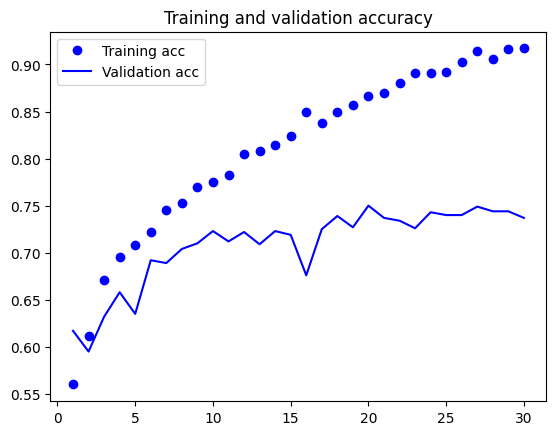

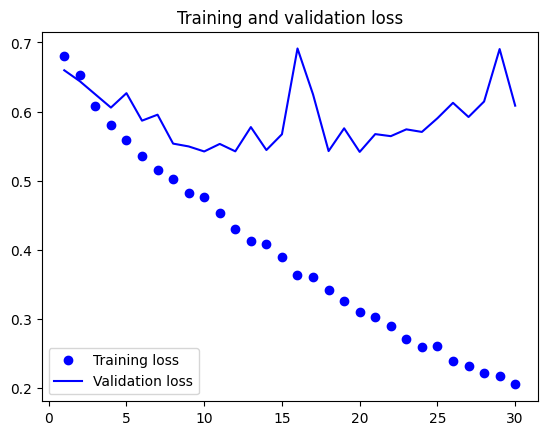

In [50]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

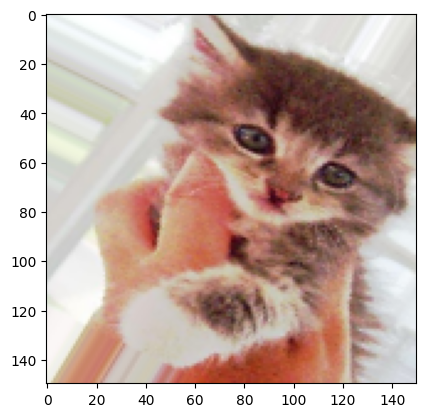

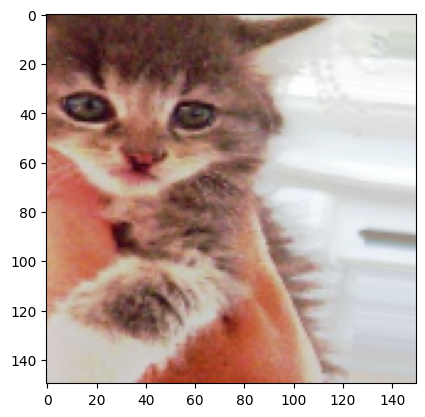

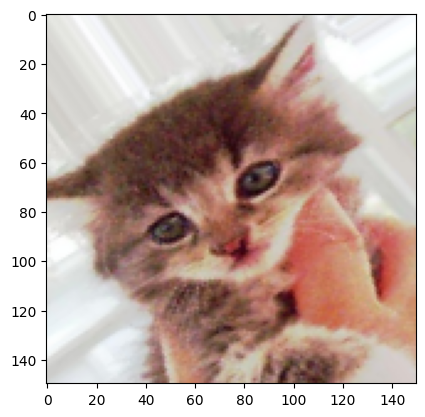

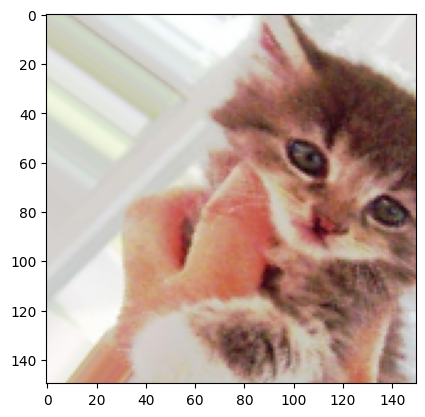

In [52]:
import keras.utils as image 
fnames = [os.path.join(train_cats_dir, fname) for
 fname in os.listdir(train_cats_dir)]
img_path = fnames[3] 
img = image.load_img(img_path, target_size=(150, 150)) 
x = image.img_to_array(img) # Преобразование в массив Numpy с формой (150, 150, 3)
x = x.reshape((1,) + x.shape) 
i = 0
for batch in datagen.flow(x, batch_size=1):
 plt.figure(i)
 imgplot = plt.imshow(image.array_to_img(batch[0]))
 i += 1
 if i % 4 == 0:
     break 
plt.show()

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

In [60]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir, #Целевой каталог
 target_size=(150, 150), #Приведение всех изображений к размеру 150 × 150
 batch_size=32,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 val_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')
history = model.fit_generator(
 train_generator,
#  steps_per_epoch=100, можно поставить, но он пошлёт
 epochs=100,
 validation_data=validation_generator,
#  validation_steps=50
)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\igorv\AppData\Local\Temp\ipykernel_234744\1095551909.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
63/63 [==============================] - 32s 500ms/step - loss: 0.4072 - acc: 0.8260 - val_loss: 0.4241 - val_acc: 0.8070
Epoch 2/100
63/63 [==============================] - 30s 480ms/step - loss: 0.4056 - acc: 0.8135 - val_loss: 0.4423 - val_acc: 0.7990
Epoch 3/100
63/63 [==============================] - 31s 484ms/step - loss: 0.3898 - acc: 0.8095 - val_loss: 0.5787 - val_acc: 0.7460
Epoch 4/100
63/63 [==============================] - 31s 482ms/step - loss: 0.3967 - acc: 0.8230 - val_loss: 0.4305 - val_acc: 0.8100
Epoch 5/100
63/63 [==============================] - 30s 479ms/step - loss: 0.3721 - acc: 0.8260 - val_loss: 0.4592 - val_acc: 0.8030
Epoch 6/100
63/63 [==============================] - 30s 481ms/step - loss: 0.3749 - acc: 0.8230 - val_loss: 0.4475 - val_acc: 0.7970
Epoch 7/100
63/63 [==============================] - 30s 480ms/step - loss: 0.3862 - acc: 0.8260 - val_loss: 0.4433 - val_acc: 0.7910
Epoch 8/100
63/63 [==============================] - 30s 479ms

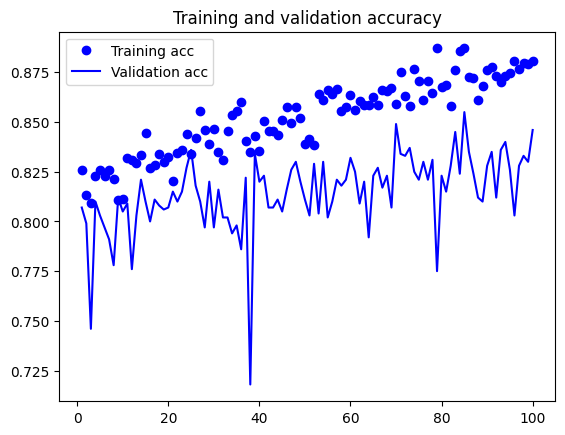

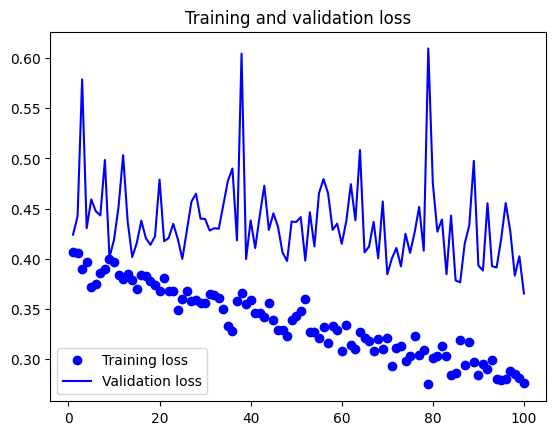

In [61]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [64]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = base
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break 
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 660ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 647ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 645ms/step


In [65]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
 loss='binary_crossentropy',
 metrics=['acc'])
history = model.fit(train_features, train_labels,
 epochs=30,
 batch_size=20,
 validation_data=(validation_features, validation_labels))

Epoch 1/30


c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


ValueError: in user code:

    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\igorv\OneDrive\Documents\GitHub\NeuralNetworks\.venv\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 8192), found shape=(20, 4, 4, 512)


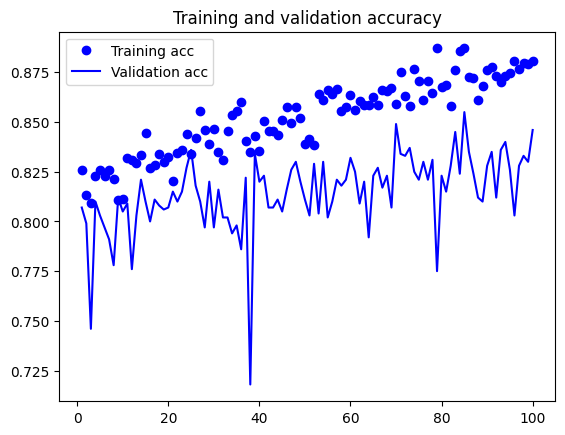

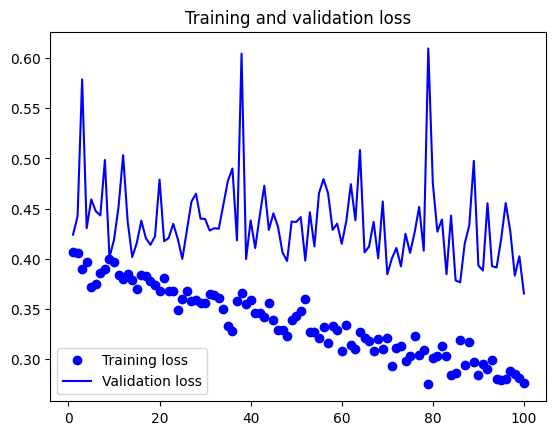

In [66]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


## Полное обучение модели с замороженной сверточной основой

In [68]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150), 
 batch_size=20,
 class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=2e-5),
 metrics=['acc'])
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,# возможно убрать надо
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\igorv\AppData\Local\Temp\ipykernel_234744\2629320482.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 331s 3s/step - loss: 0.4416 - acc: 0.7765 - val_loss: 0.1692 - val_acc: 0.9270
Epoch 2/30
100/100 [==============================] - 328s 3s/step - loss: 0.2743 - acc: 0.8830 - val_loss: 0.1560 - val_acc: 0.9370
Epoch 3/30
100/100 [==============================] - 327s 3s/step - loss: 0.2191 - acc: 0.9090 - val_loss: 0.0992 - val_acc: 0.9610
Epoch 4/30
100/100 [==============================] - 322s 3s/step - loss: 0.1847 - acc: 0.9240 - val_loss: 0.2681 - val_acc: 0.8960
Epoch 5/30
100/100 [==============================] - 316s 3s/step - loss: 0.1546 - acc: 0.9460 - val_loss: 0.0900 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 317s 3s/step - loss: 0.1424 - acc: 0.9360 - val_loss: 0.0901 - val_acc: 0.9690
Epoch 7/30
100/100 [==============================] - 313s 3s/step - loss: 0.1029 - acc: 0.9605 - val_loss: 0.1624 - val_acc: 0.9380
Epoch 8/30
100/100 [==============================] - 316s 3s/step - 

## Дообучение

In [69]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [70]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [72]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-5),
 metrics=['acc'])
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50)

C:\Users\igorv\AppData\Local\Temp\ipykernel_234744\2298135060.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.0040 - acc: 0.9985 - val_loss: 0.2166 - val_acc: 0.9740
Epoch 2/100
100/100 [==============================] - 155s 2s/step - loss: 0.0017 - acc: 0.9985 - val_loss: 0.2307 - val_acc: 0.9730
Epoch 3/100
100/100 [==============================] - 160s 2s/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.2926 - val_acc: 0.9720
Epoch 4/100
100/100 [==============================] - 138s 1s/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.2518 - val_acc: 0.9720
Epoch 5/100
100/100 [==============================] - 131s 1s/step - loss: 0.0071 - acc: 0.9975 - val_loss: 0.2434 - val_acc: 0.9720
Epoch 6/100
100/100 [==============================] - 125s 1s/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.2866 - val_acc: 0.9720
Epoch 7/100
100/100 [==============================] - 126s 1s/step - loss: 0.0025 - acc: 0.9990 - val_loss: 0.2888 - val_acc: 0.9730
Epoch 8/100
100/100 [==============================] - 124s 1s

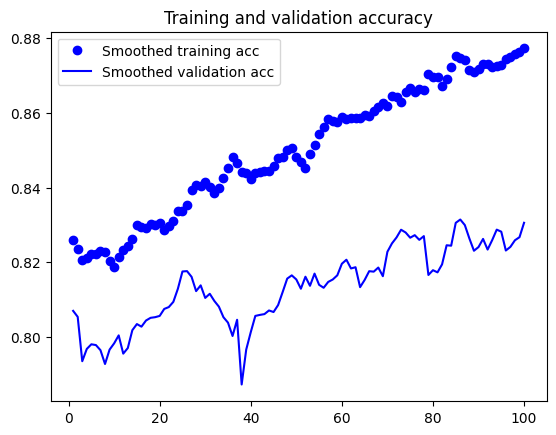

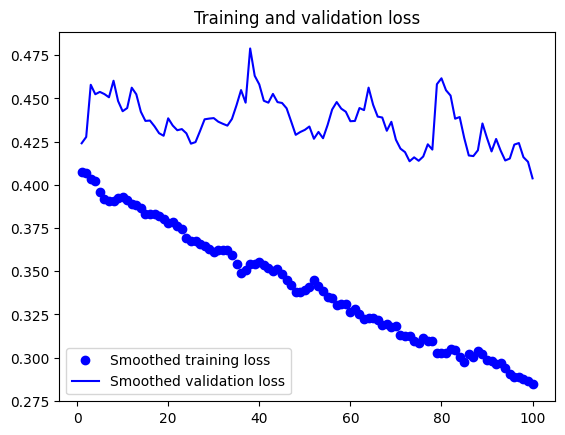

In [73]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', 
         label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', 
         label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\igorv\AppData\Local\Temp\ipykernel_234744\4045078979.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.972000002861023


# Визуализируем промежуточные активации

In [75]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [79]:
img_path = 'C:/Users/igorv/OneDrive/Documents/Github/NeuralNetworks/from_book/data/cats_and_dogs/test/cats/1700.jpg'
import keras.utils as image 
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. 
# Его форма (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


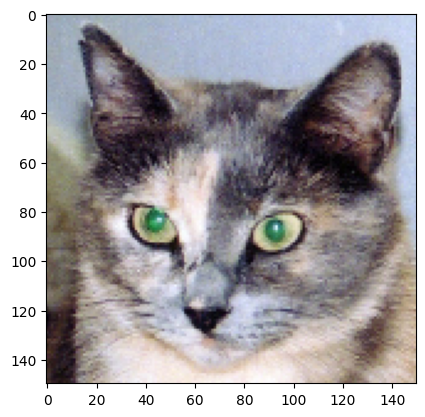

In [80]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [81]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, 
                                outputs=layer_outputs)

In [82]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 116ms/step


In [83]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


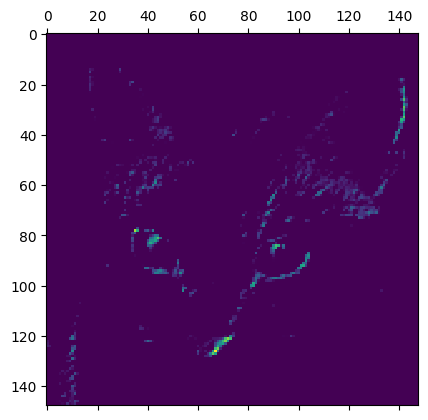

In [84]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

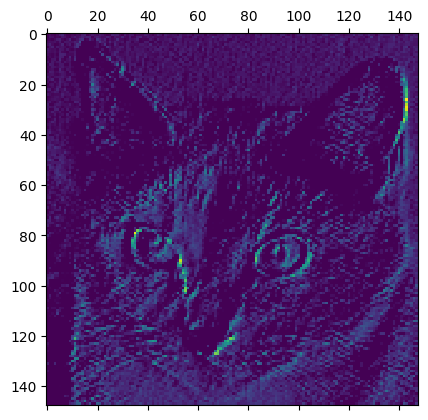

In [85]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

C:\Users\igorv\AppData\Local\Temp\ipykernel_234744\313677591.py:15: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


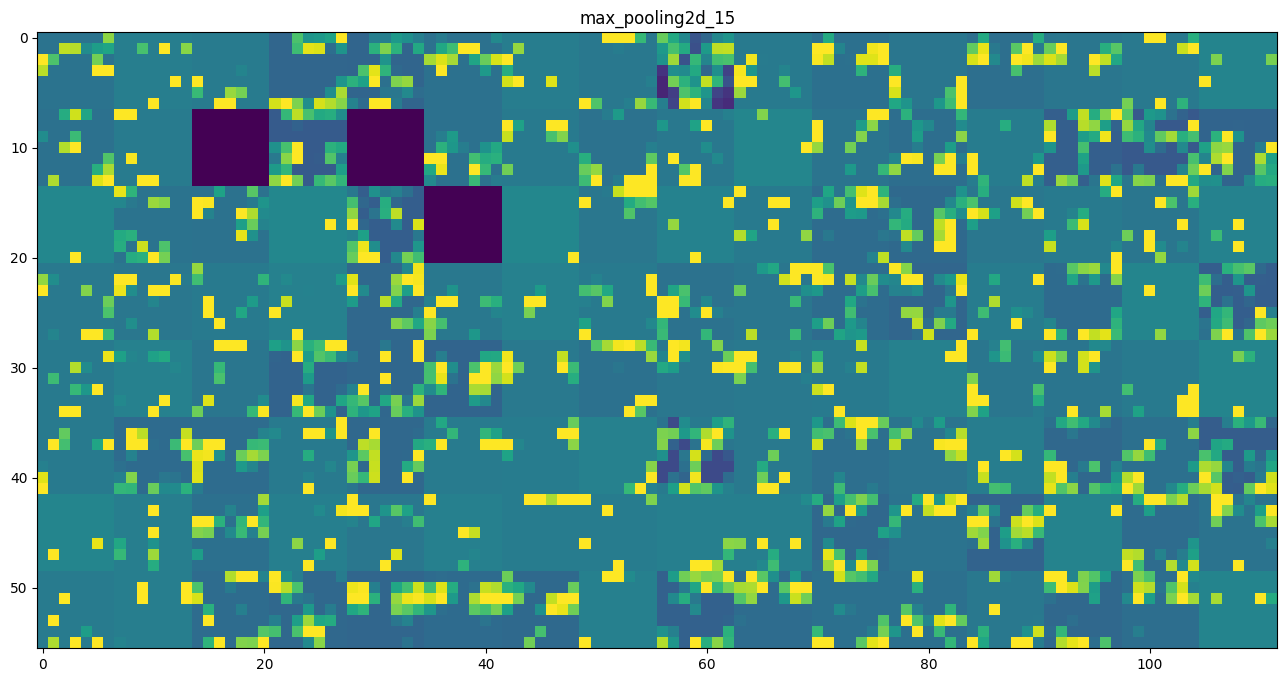

In [86]:
layer_names = [] 
for layer in model.layers[:8]: 
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Вывод сетки
                    row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')